In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [206]:
import epdlib
import logging
from datetime import datetime
from PIL import Image, ImageDraw
import math

In [61]:
logger = logging.getLogger()

In [64]:
logger.setLevel(logging.DEBUG)

In [3]:
import sys
sys.path.append('../')

In [7]:
import layouts

In [4]:
from waveshare_epd import epd5in83

In [107]:
def check_num(func):
    """decorator function wrapper"""
    def func_wrapper(d, *args, **kwargs):
        """Check for positive integers
        Params:
            d(int): integer to check
        
        Raises:
            ValueError - values that are negative, not integer"""
        if not isinstance(d, int):
            raise ValueError (f'{d} is not an integer')
        if d < 0:
            raise ValueError (f'{d} < 0 {func} only accepts values >= 0')
        return func(d, *args, **kwargs)
    return func_wrapper

In [20]:
s = epdlib.Screen()
s.epd = epd5in83

In [25]:
b = epdlib.ImageBlock(area=(600, 600))

In [87]:
img_dim = [640, 480]
max_radius = min(img_dim)
clock_dim = (max_radius, max_radius)
img_center = [int(clock_dim[0]/2), int(clock_dim[1]/2)]
logging.debug(f'img_center: {img_center}')
print(img_center)


DEBUG:root:img_center: [240, 240]


[240, 240]


In [88]:
i = Image.new('RGBA', clock_dim, (255, 0, 0, 0))
d = ImageDraw.Draw(i)

In [242]:
def draw_tick(dim, fill=None, width=2):
    color = (0, 0, 0)
    if not isinstance(dim, (tuple, list)):
        raise ValueError(f'dim is not a list or list like object: {dim}')
    i = Image.new('RGBA', dim, (255, 0, 0, 0))
    d = ImageDraw.Draw(i)
    if fill:
        fill = color
    d.rectangle([(0, 0), (dim[0], dim[1])], fill=fill, outline=color, width=width)
    
    return i

In [513]:
def rotate_object(obj, position, radius, translate=False):
    if not isinstance(obj, Image.Image):
        raise TypeError(f'`obj` must be of type PIL.Image.Image: {type(obj)}')
    if 0 > position or position > 60:
        raise ValueError(f'`position` must be between 0 and 60 inclusive: {position}')
    
#     dim = (radius, radius)
#     i = Image.new('RGBA', dim, (255, 0, 0, 0))
    dim = (obj.width, radius)
    i = Image.new('RGBA', [t.width, radius], (150, 255, 10, 255))
    i.paste(obj)
#     d = ImageDraw.Draw(i)
    q = i.rotate(-6*position, expand=True)
    return q

In [514]:
def basic_clock(area):
    '''
    return a PIL image object with a basic clock layout
        dimensions are set to the maximum square that will fit within the area
        
    Paramaters:
        area(`tuple` or `list`): X, Y dimensions of area to fill with a clock
        
    Returns:
        PIL image object
    '''
    if not isinstance(area, (tuple, list)):
        raise ValueError(f'area is not a list or list like object: {area}')
    max_diameter = min(area)
    clock_dim = (max_diameter, max_diameter)
    clock_radius = int(max_diameter/2)
    
    img_center = [int(clock_dim[0]/2), int(clock_dim[0]/2)]
    logging.debug(f'img_center = {img_center}')
    i = Image.new('RGBA', clock_dim, (255, 0, 0, 0))
    d = ImageDraw.Draw(i)
    d.ellipse((0, 0, clock_dim[0], clock_dim[1]), outline=(0, 0, 0), fill=None, width=int(clock_radius*.02))
    
    perimiter = 2 * math.pi * clock_radius
    major_tick_dim = [int(perimiter/60*3), int(clock_radius*.1)]
    logging.debug(f'major tick dimensions: {major_tick_dim}')
    
    major_tick = draw_tick(major_tick_dim, True)
    
    for tick in [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]: #, 25,30, 35, 40, 45, 50, 55]:
#         logging.debug(f'pasting tick: {tick}')
        angle = tick*6
        unit_angle = math.radians(angle-90)
        
        my_tick = rotate_object(major_tick, tick, clock_radius-int(clock_radius*.02), translate=True)
        
        if math.cos(unit_angle) > 0:
            x = clock_radius
        else:
            x = clock_radius - my_tick.width
        
        if math.sin(unit_angle) >= 0:
            y = clock_radius
        else:
            y = clock_radius - my_tick.height
            

#         logging.debug(f'angle: {angle}\n\tx,y: {(x, y)}\n\tcos, sin: {math.cos(unit_angle)}, {math.sin(unit_angle)}\n')

        i.paste(my_tick, (x, y), my_tick)
        
    
    return i

DEBUG:root:img_center = [450, 450]
DEBUG:root:major tick dimensions: [141, 45]


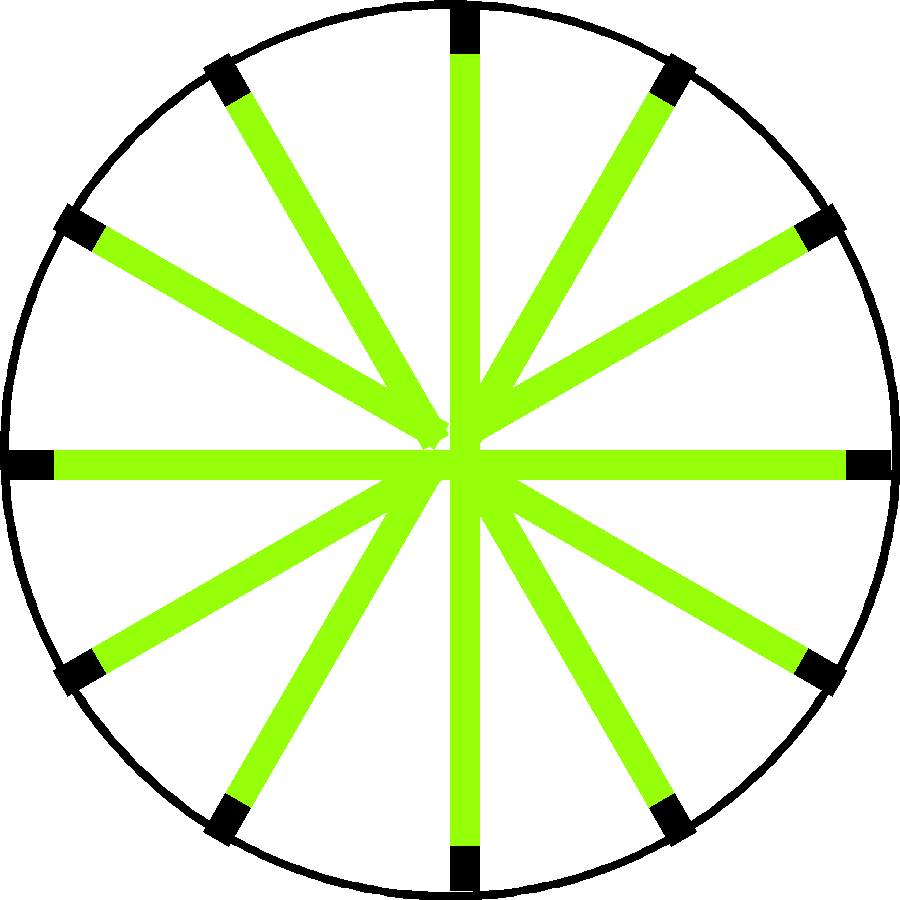

In [515]:
q = basic_clock((900,900))
# q.paste(t_r, (240, 240), t_r)
q

In [392]:
for a in [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    angle = a*6
    unit_angle = angle - 90
    cos = math.cos(math.radians(unit_angle))
    sin = math.sin(math.radians(unit_angle))
    print(f'min: {a}\n\tangle: {angle}\n\tunit_angle:{unit_angle}\n\tsin: {sin}\n\tcos: {cos}')

min: 0
	angle: 0
	unit_angle:-90
	sin: -1.0
	cos: 6.123233995736766e-17
min: 5
	angle: 30
	unit_angle:-60
	sin: -0.8660254037844386
	cos: 0.5000000000000001
min: 10
	angle: 60
	unit_angle:-30
	sin: -0.49999999999999994
	cos: 0.8660254037844387
min: 15
	angle: 90
	unit_angle:0
	sin: 0.0
	cos: 1.0
min: 20
	angle: 120
	unit_angle:30
	sin: 0.49999999999999994
	cos: 0.8660254037844387
min: 25
	angle: 150
	unit_angle:60
	sin: 0.8660254037844386
	cos: 0.5000000000000001
min: 30
	angle: 180
	unit_angle:90
	sin: 1.0
	cos: 6.123233995736766e-17
min: 35
	angle: 210
	unit_angle:120
	sin: 0.8660254037844387
	cos: -0.4999999999999998
min: 40
	angle: 240
	unit_angle:150
	sin: 0.49999999999999994
	cos: -0.8660254037844387
min: 45
	angle: 270
	unit_angle:180
	sin: 1.2246467991473532e-16
	cos: -1.0
min: 50
	angle: 300
	unit_angle:210
	sin: -0.5000000000000001
	cos: -0.8660254037844386
min: 55
	angle: 330
	unit_angle:240
	sin: -0.8660254037844384
	cos: -0.5000000000000004
min: 60
	angle: 360
	unit_angle:

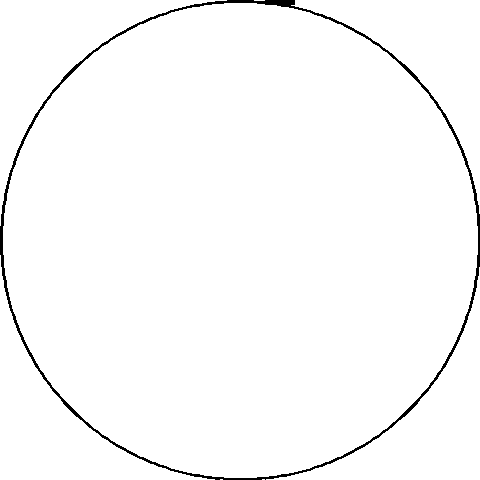

In [277]:
q